# Neural Network Implementation
_Example taken from the [GADS22NYC](https://github.com/ga-students/GADS-22-NYC) class by Mark Holt._

Please see [neural_network.py](./neural_network.py) for a home-made version of a neural net.

In [8]:
from neural_network import NeuralNet

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cross_validation import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_curve, auc
# from sklearn import metrics
# from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.datasets import make_blobs

In [10]:
def my_confusion_matrix(y_test, y_hat, names):
    '''This function uses the pd.crosstab function to create a confusion matrix:
    predictions are the predictions from the predictive mode
    y are the known class labels
    names are the names of the features used in the model'''
    
    cf = pd.crosstab(y_test, y_hat)
    cf.columns = names
    cf.index = names
    cf.columns.name = 'Prediction'
    cf.index.name = 'Actual'
    return cf

<hr>
## Digit recognition

In [11]:
digits = datasets.load_digits()

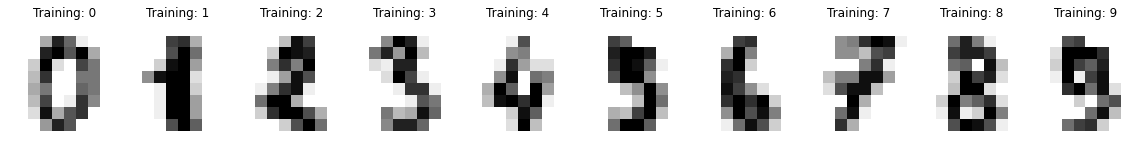

In [12]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i\n' % label)

Only take a limited amount of digits to speed up.

In [13]:
n_digits = 3  
idx = digits.target < n_digits
X, y = digits.data[idx], digits.target[idx]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
%%time
model = NeuralNet(hidden=4, eta=0.1, max_iter=500)
model.fit_es(X_train, y_train, X_test, y_test)

. . . .CPU times: user 1min 15s, sys: 178 ms, total: 1min 16s
Wall time: 1min 16s



In [16]:
y_pred = model.predict(X_test)

In [17]:
(y_pred == y_test).mean()

0.94052044609665431

In [18]:
cm = my_confusion_matrix(y_test, y_pred, range(n_digits))
cm

Prediction,0,1,2
Actual,,,
0,85,0,0
1,2,90,2
2,4,8,78


<hr>
## Iris dataset

In [19]:
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.5, random_state=0)

scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
%%time
model = NeuralNet(hidden=4, eta=0.1, max_iter=500)
model.fit_es(X_train, y_train, X_test, y_test)

. . . .CPU times: user 5.17 s, sys: 9.16 ms, total: 5.18 s
Wall time: 5.18 s



In [21]:
y_hat = model.predict(X_test)
cm = my_confusion_matrix(y_test, y_hat, iris.target_names)
cm

Prediction,setosa,versicolor,virginica
Actual,,,
setosa,21,0,0
versicolor,0,29,1
virginica,0,1,23


499


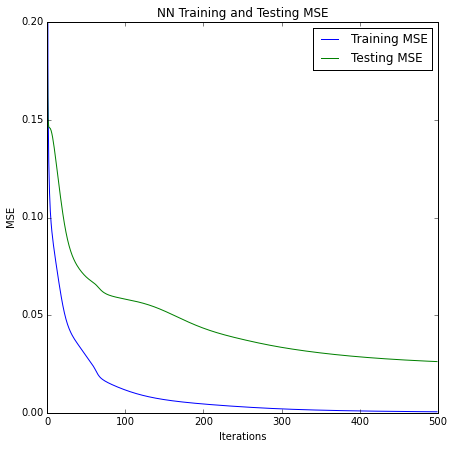

In [22]:
train_mse = model.retrieve_training_mse()
test_mse = model.retrieve_testing_mse()

fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.plot(train_mse, label = 'Training MSE')
ax.plot(test_mse, label = 'Testing MSE')
ax.set_title("NN Training and Testing MSE")
ax.set_ylabel("MSE")
ax.set_xlabel("Iterations")
ax.legend(loc='best')
ax.set_ylim(0.0, 0.2)

print model.retrieve_final_n()

<hr>
## Blobs 

We use `sklearn`'s `make_blobs` functionality to make some clusters of data. 
`make_blobs` also returns an array, y, which contains the identity of the blob
each pair of points belongs to.

In [23]:
m, N = 56, 2  # number of training examples, number of features
num_blobs = 7  # number of distinct clusters or groupings or 'blobs'
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=0.75, random_state=6)

scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(X)
X_scaled = scaler.transform(X)

Plot the blobs and color them for each blob.

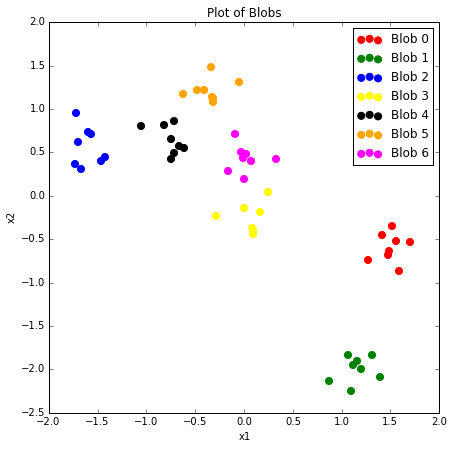

In [24]:
color_list = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'magenta', 'cyan']
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
for i in xrange(num_blobs):
    ax.scatter(X_scaled[y == i,0], X_scaled[y == i,1], color=color_list[i], s=50, label='Blob %d' % i)

ax.set_title("Plot of Blobs")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
f = ax.legend(loc='best')

In [25]:
clfB = NeuralNet(hidden=7, eta=0.1, max_iter=100, eps=5.0, lam=0.001)
clfB.fit(X_scaled, y)

In [26]:
y_hat = clfB.predict(X_scaled)

In [27]:
cm = pd.crosstab(y, y_hat,rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Actual,,,,,,,
0,8,0,0,0,0,0,0
1,0,8,0,0,0,0,0
2,0,0,8,0,0,0,0
3,0,0,0,7,0,0,1
4,0,0,0,0,8,0,0
5,0,0,0,0,0,8,0
6,0,0,0,0,0,0,8


Plot decision boundaries.

NameError: name 'np' is not defined

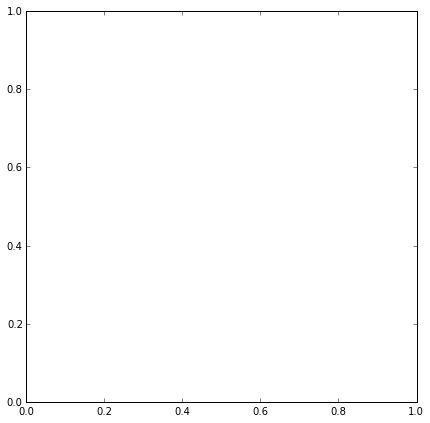

In [28]:
fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)

#find the limits required for the plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

#step size for the mesh
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#predict over the mesh
Z = clfB.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.1)

color_list = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'magenta', 'cyan']

#re-plot the points
for i in xrange(num_blobs):
    ax.scatter(X_scaled[y == i,0], X_scaled[y == i,1], color=color_list[i], s=50, label='Blob 1, y = 1')


ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Neural Network Decision Boundary")
ax.set_xlabel("X Scaled")
ax.set_ylabel("y Scaled")